# 1a

In [26]:
from scipy.stats import poisson
import numpy as np
import matplotlib.pyplot as plt

def randtimes(N, t1, t2):
    t = t1+(t2-t1)*np.random.rand(N)
    return t

def plotflash(t):
    plt.eventplot(t,lineoffsets=0.5)
    #plt.bar(times,times*0+1,width = 0.05)
    plt.xlabel('Time')
    plt.xlim(t[0]-1,t[-1]+1)
    plt.ylim(0, 1.5)
    plt.ylabel('Event')
    plt.show()

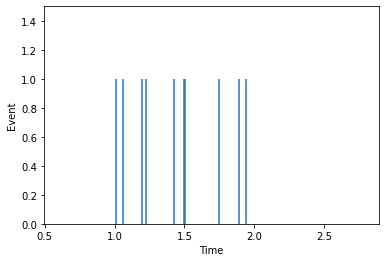

In [27]:
# example
N = 10
t1 = 1
t2 = 2
t = randtimes(N, t1, t2)
plotflash(t)


# 1b

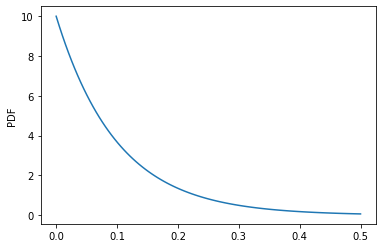

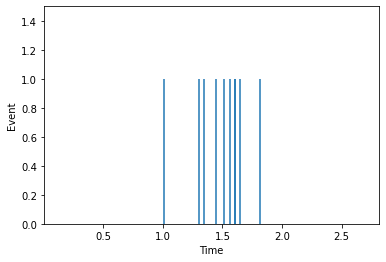

In [28]:
from scipy.stats import expon
def randintervals(N, λ, t1):
    t = np.cumsum(np.random.exponential(scale=1/λ, size=N)) + t1
    return t
λ = 10
x = np.linspace(0, 5/λ, 100)
plt.plot(x, expon.pdf(x, scale=1/λ))
plt.ylabel('PDF')
plt.show()


N = 10
t1 = 1
t = randintervals(N, λ, t1)
plotflash(t)


# 1c
First use Poisson process, which models the occurrence of events over time as a series of independent, random events with a constant average rate. The second use exponential distribution, which models the distribution of intervals between events in a Poisson process.
Both methods generate event times that are probabilistic because they model the occurrence of events as a random process. For example, in the limit of seeing a flash with just a small number of photons, the actual number of photons detected by each photoreceptor is inherently uncertain due to the probabilistic nature of the underlying process. This means that it is possible to miss the detection of some photons, or to detect more photons than expected, which in turn leads to uncertainty in the perceived brightness of the flash. This is why the detection of a minimum number of photons within a certain interval to separate signal from noise is inherently probabilistic.

# 2a

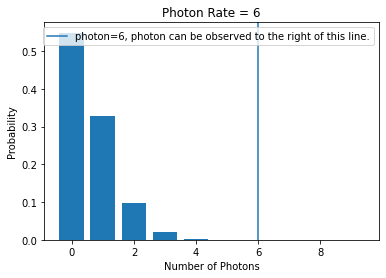

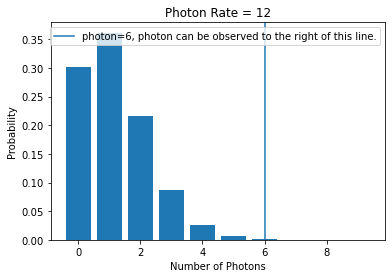

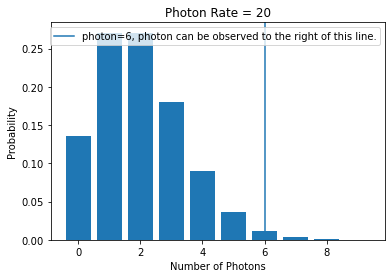

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson

def plot_poisson_pdf(λ, n):
    x = np.arange(0, 10)
    y = poisson.pmf(x, λ*0.1)
    plt.bar(x, y)
    plt.axvline(x=6, label='photon=6, photon can be observed to the right of this line.')
    plt.legend()
    plt.xlabel('Number of Photons')
    plt.ylabel('Probability')
    plt.title('Photon Rate = {}'.format(λ))
    plt.show()


λ = 6
n = 6
plot_poisson_pdf(λ, n)

λ *= 2
plot_poisson_pdf(λ, n)

λ = 20
plot_poisson_pdf(λ, n)

# 2b

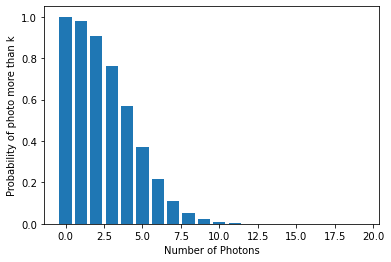

In [30]:
def detectionprob(K, λ=40, T=0.1):
    cdf=0
    while K > 0:
        cdf = cdf + poisson.pmf(K-1, λ*T)
        K=K-1
    return 1-cdf

x = np.arange(0, 20)
y=[]
for k in x:
    y.append(detectionprob(K = k, λ = 40,T = 0.1))
plt.bar(x, y)
plt.xlabel('Number of Photons')
plt.ylabel('Probability of photo more than k')
plt.show()

# 3a

array([0.81112199, 0.82504339, 0.83123722, 0.83148744, 0.83535866,
       0.86123169, 0.88479873, 0.88877711, 0.89451577, 0.89822454,
       0.90277908, 0.9059065 , 0.91491111, 0.92147291, 0.92315161,
       0.92497274, 0.95358448, 0.959612  , 0.96086648, 0.9736558 ,
       0.97404839, 0.98861762, 0.99104031, 0.99376088, 1.00644624,
       1.03144474, 1.03950134, 1.05171302, 1.06847805, 1.07643589,
       1.1077896 , 1.10790121, 1.11189758, 1.11194873, 1.11851415,
       1.1189773 , 1.12884679, 1.13607304, 1.15108854, 1.16174575,
       1.1761556 , 1.19400012, 1.21743334, 1.22841498, 1.23399079,
       1.24495209, 1.2538445 , 1.26023041, 1.2620457 , 1.26383247,
       1.26631308, 1.28844348, 1.29087441, 1.29820857, 1.30216838,
       1.32109257, 1.33716169, 1.34776846, 1.37176885, 1.37979555,
       1.3843276 , 1.38760108, 1.38893716, 1.39054964, 1.39276728,
       1.40248496, 1.41031636, 1.412025  , 1.42510863, 1.44642137,
       1.45321233, 1.4547972 , 1.45480414, 1.46669945, 1.46809

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 120572 (\N{MATHEMATICAL ITALIC SMALL ALPHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


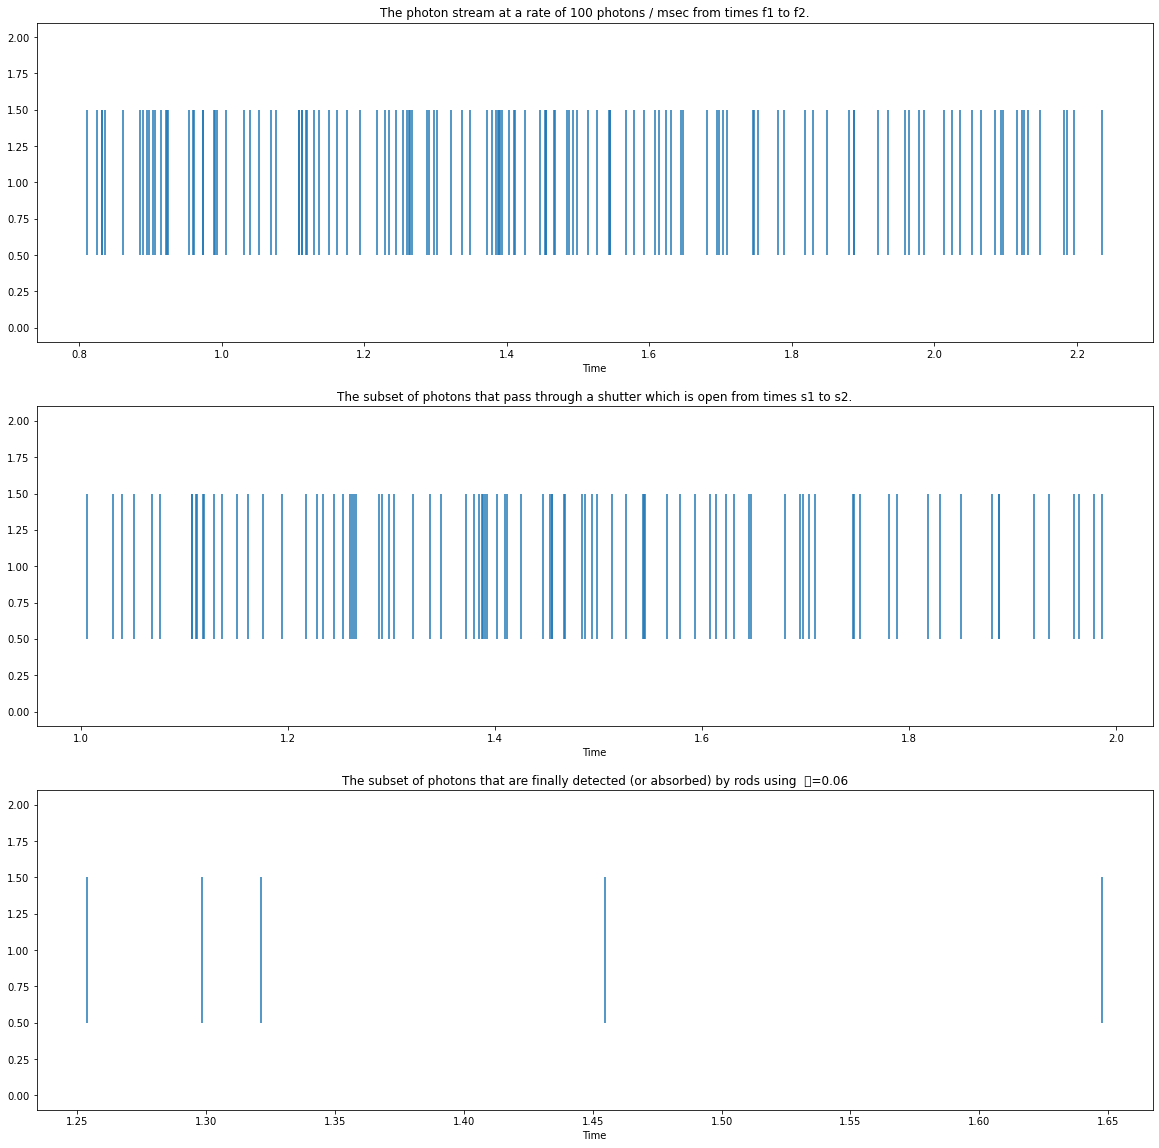

In [31]:
def lightflash(λ, t1=0.8, t2=2.2):
    x = []
    while t1 < t2:
        t1 += np.random.exponential(scale=1/λ)
        x.append(t1)
    t =  np.array(x)
    s1=1
    s2=2
    𝛼=0.06
    fig, axs = plt.subplots(3, figsize=(20,20))
    axs[0].eventplot(t)
    axs[0].set_title('The photon stream at a rate of 100 photons / msec from times f1 to f2.')
    axs[0].set_xlabel('Time')
    
    shutter = t[(t >= s1) & (t < s2)]
    axs[1].eventplot(shutter)
    axs[1].set_title('The subset of photons that pass through a shutter which is open from times s1 to s2.')
    axs[1].set_xlabel('Time')
    
    detection = shutter[np.random.random(len(shutter)) < 𝛼]
    axs[2].eventplot(detection)
    axs[2].set_title('The subset of photons that are finally detected (or absorbed) by rods using  𝛼=0.06')
    axs[2].set_xlabel('Time')
    return t


lightflash(100)

# 3b

In [38]:
def probseeing(I, α=0.06, K=6):
    return detectionprob(K, λ=α * I, T=0.1)

# 3c

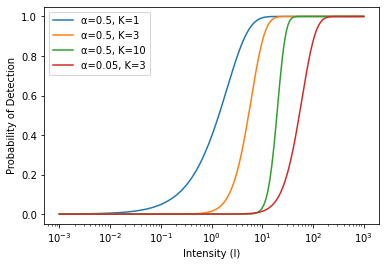

In [55]:
def plotdetectioncurve(α=0.5, K=6):
    I = np.logspace(-3, 3, 150)
    P = [poisson.sf(K-1, α * i) for i in I]
    return I,P
I,P=plotdetectioncurve(α=0.5, K=1)
plt.plot(I,P,label="α=0.5, K=1")
I,P=plotdetectioncurve(α=0.5, K=3)
plt.plot(I,P,label="α=0.5, K=3")
I,P=plotdetectioncurve(α=0.5, K=10)
plt.plot(I,P,label="α=0.5, K=10")
I,P=plotdetectioncurve(α=0.05, K=3)
plt.plot(I,P,label="α=0.05, K=3")
plt.legend()
plt.xscale('log')
plt.xlabel('Intensity (I)')
plt.ylabel('Probability of Detection')
plt.show()

# 3d

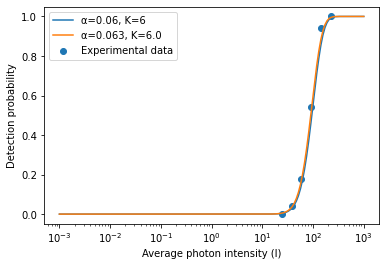

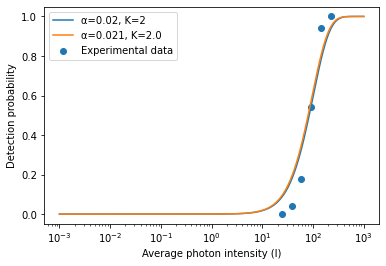

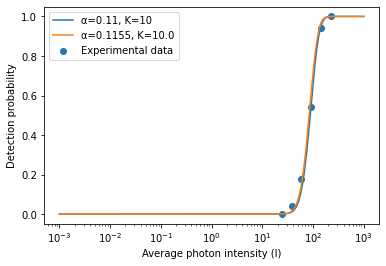

In [56]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def plotfit(α=0.06, K=6):
    x = np.array([24.1, 37.6, 58.6, 91.0, 141.9, 221.3])
    y = np.array([0.0, 4.0, 18.0, 54.0, 94.0, 100.0]) / 100

    def mse(params):
        α, K = params
        f = np.array([probseeing(I, α, K) for I in x])
        return np.mean((y - f)**2)

    result = minimize(mse, [α, K], method='Nelder-Mead')
    α_opt, K_opt = result.x

    I,P = plotdetectioncurve(α=α, K=K)
    plt.plot(I,P,label="α={}, K={}".format(α,K))
    I,P = plotdetectioncurve(α=α_opt, K=K_opt)
    plt.plot(I,P,label="α={}, K={}".format(α_opt,K_opt))
    plt.scatter(x, y, label='Experimental data')
    plt.legend()
    plt.xscale('log')
    plt.xlabel('Average photon intensity (I)')
    plt.ylabel('Detection probability')
    plt.show()

plotfit()
plotfit(α=0.02, K=2)
plotfit(α=0.11, K=10)



The optimal values of $\alpha$ and $K$ found by this optimization are α_opt = 0.06 and K_opt = 6, which are close to the default values used in the probseeing function.

The number of photons required in order to see a dim flash of light depends on several factors, including the sensitivity of the individual's eyes, the background light levels, and the duration of the flash. However, as a rough estimate, it is thought that a minimum of around 6 photons are required to see a dim flash of light. This estimate is based on